In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
import glob
import os

In [2]:
path = r'./data_all/' 
all_files = glob.iglob(os.path.join(path, "*.csv"))
df_from_each_file = (pd.read_csv(f) for f in all_files)
df_con = pd.concat(df_from_each_file, ignore_index=True)
#print (df_con)
data = df_con.iloc[:,range(2,11)]
data=data.drop_duplicates()
#print (data)
data.to_csv('correlation_data_concatenated.csv')

data_clean=pd.read_csv('correlation_data_concatenated.csv')
data_clean=data_clean.drop(data_clean.columns[0], axis=1)
print (data_clean)

             rg  mean_displacement     shape   density  clique_number  \
0      0.474618           0.000000  0.000306  0.001343              3   
1      0.464732          20.724373 -0.000009  0.001347              2   
2      0.461643          20.079818  0.000013  0.001350              2   
3      0.458490          22.115586  0.000187  0.001349              2   
4      0.456447          21.998844  0.000182  0.001351              3   
...         ...                ...       ...       ...            ...   
13698  0.419562           1.111165 -0.001583  0.001423              6   
13699  0.419378           1.070154 -0.001506  0.001425              6   
13700  0.419409           1.048686 -0.001516  0.001429              6   
13701  0.419777           1.034306 -0.001443  0.001425              6   
13702  0.419195           1.079562 -0.001524  0.001426              6   

       average_clustering  mean_closeness  mean_betweenness  assortativity  
0                0.005668        0.000083     

In [3]:
df_corr=data_clean.corr(method='pearson')
print(df_corr)

                          rg  mean_displacement     shape   density  \
rg                  1.000000          -0.458913 -0.101440 -0.759975   
mean_displacement  -0.458913           1.000000  0.090290  0.198374   
shape              -0.101440           0.090290  1.000000  0.256212   
density            -0.759975           0.198374  0.256212  1.000000   
clique_number      -0.035553          -0.420242 -0.034375  0.203047   
average_clustering  0.046762          -0.492670 -0.072590  0.065928   
mean_closeness      0.001925          -0.482678 -0.035701  0.140898   
mean_betweenness    0.129060          -0.303459 -0.020250 -0.103442   
assortativity       0.036495           0.484649  0.020925 -0.192274   

                    clique_number  average_clustering  mean_closeness  \
rg                      -0.035553            0.046762        0.001925   
mean_displacement       -0.420242           -0.492670       -0.482678   
shape                   -0.034375           -0.072590       -0.035701 

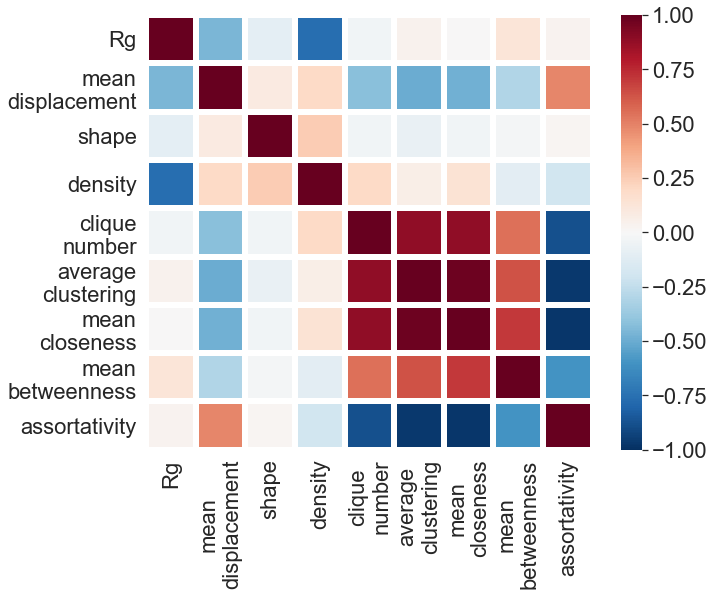

In [4]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(10,8))        
x_axis_labels = ['Rg','mean\n'+'displacement','shape','density','clique\n'+'number','average\n'+'clustering',
                'mean\n'+'closeness','mean\n'+'betweenness','assortativity']
y_axis_labels = ['Rg','mean\n'+'displacement','shape','density','clique\n'+'number','average\n'+'clustering',
                'mean\n'+'closeness','mean\n'+'betweenness','assortativity']
corr_plot=sns.heatmap(df_corr,cmap = "RdBu_r",vmin=-1, vmax=1,linewidths=5,ax=ax,xticklabels=x_axis_labels,
                     yticklabels=y_axis_labels)
figure = corr_plot.get_figure()    
figure.savefig('correlation.png', dpi=1000,bbox_inches = "tight")


In [5]:
profile = ProfileReport(data_clean, title="Pandas Profiling Report")
profile.to_widgets()

In [6]:
profile.to_notebook_iframe()

In [7]:
profile.to_file("MEDYAN_correlation.html")